In [1]:
import os
import sys
sys.path.append("..")
from model.vit_vqgan.model import ViTVQGAN
from model.vit_vqgan.config import ViTVQGANConfig
from model.vit_vqgan.tokenizer import ImageTokenizer

/home/andrew264/miniconda3/envs/torch-cuda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = ViTVQGAN(config=ViTVQGANConfig())

VQLPIPSWithDiscriminator running with vanilla loss.


In [3]:
import torch

path = "/home/andrew264/PycharmProjects/ImageExperiments/weights/vitvqgan/weights-v6.ckpt"
sd = torch.load(path, weights_only=False)['state_dict']
model.load_state_dict(sd, strict=False)

<All keys matched successfully>

In [4]:
tokenizer = ImageTokenizer(model=model)

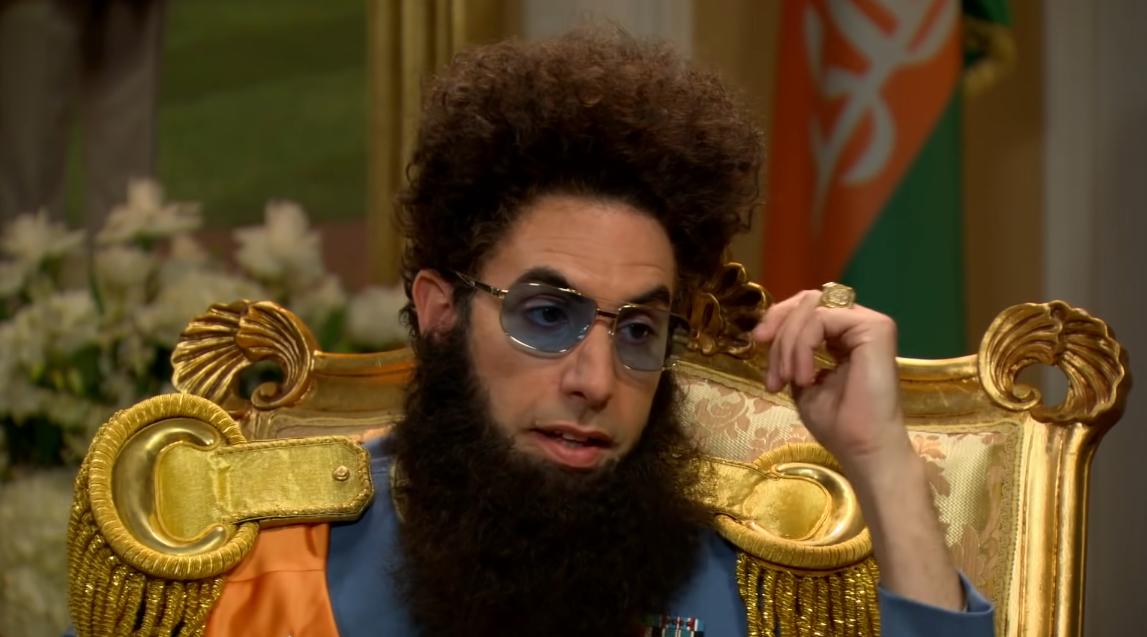

In [5]:
test_img = "/home/andrew264/PycharmProjects/ImageExperiments/data/test.png"
from PIL import Image
Image.open(test_img)

In [6]:
indices, grid = tokenizer.tokenize(Image.open(test_img))
indices[0], indices[0].shape

(tensor([[749, 343, 442,  ..., 206,  59, 830],
         [500, 614, 697,  ..., 237,  60, 829],
         [501, 614, 697,  ..., 245, 125, 819],
         ...,
         [245, 420, 864,  ..., 249, 189, 881],
         [244, 676, 864,  ..., 249, 189, 881],
         [244, 349, 872,  ..., 250, 189, 889]], dtype=torch.int32),
 torch.Size([2769, 8]))

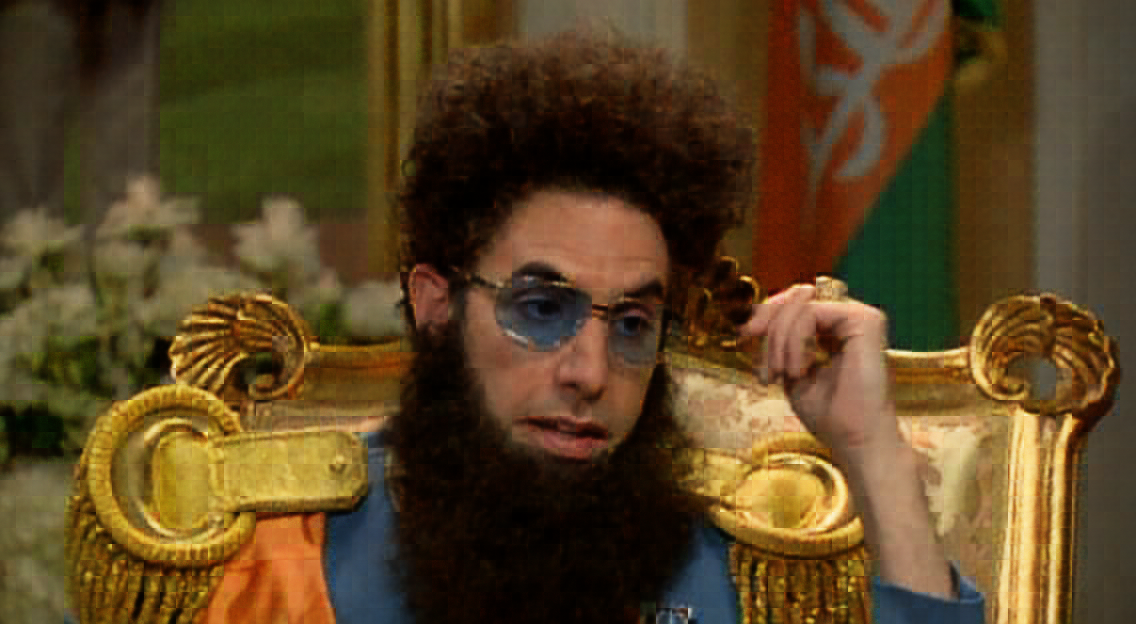

In [7]:
tokenizer.detokenize(indices, grid)[0]